In [13]:
import os
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [14]:
path_preimages = "/Users/sakshisharma/Desktop/Mexico/Image/Pre-disaster"
path_postimages = "/Users/sakshisharma/Desktop/Mexico/Image/Post-disaster"
path_mbi_features = "/Users/sakshisharma/Desktop/Mexico/Feature/MBI"
output_path = "/Users/sakshisharma/Desktop/Mexico/Processed_NPY"
os.makedirs(output_path, exist_ok=True)

In [ ]:
#Shadow hsv function 
import cv2

def shadow_mask(image_rgb, threshold_v = 0.3):
    if image_rgb.dtype != np.uint8:
        image_rgb = (image_rgb * 255).astype(np.uint8)

    hsv = cv2.cvtColor( image_rgb, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:,:,2]/255.0

    shadow_mask = (v_channel < threshold_v).astype(np.uint8)
    return shadow_mask


In [26]:
path_labels = "/Users/sakshisharma/Desktop/Mexico/Label"

In [27]:
tif_files = [file for file in os.listdir(path_preimages) if file.endswith('.tif')]
pre_tif_files = [file for file in os.listdir(path_preimages) if file.endswith('.tif')]
post_tif_files = [file for file in os.listdir(path_postimages) if file.endswith('.tif')]
label_tif_files = [f for f in os.listdir(path_labels) if f.endswith('.tif')]
mbi_tif_files = [f for f in os.listdir(path_mbi_features) if f.endswith('.tif')]

In [28]:
def normalize_dataset_images(path, filename):
    image_daatset = tiff.imread(os.path.join(path, filename))
    if image_daatset.dtype != np.float32:
        image_daatset = image_daatset.astype(np.float32) / 255.0
    return image_daatset

In [30]:
save_path = "/Users/sakshisharma/Desktop/Mexico/Processed_NPY"
os.makedirs(save_path, exist_ok=True)

for file in pre_tif_files:
    if file in post_tif_files and file in mbi_tif_files:
        pre_image = tiff.imread(os.path.join(path_preimages, file)) / 255.0
        post_image = tiff.imread(os.path.join(path_postimages, file)) / 255.0
        mbi = tiff.imread(os.path.join(path_mbi_features, file)) / 255.0

        if mbi.ndim == 3:
            mbi = mbi[:, :, 0]

        shadow_pre = shadow_mask(pre_image)
        shadow_post= shadow_mask(post_image)
        shadow_diff = np.abs(shadow_post - shadow_pre)

        combined = np.dstack([
            pre_image,
            post_image,
            mbi,
            shadow_pre,
            shadow_post,
            shadow_diff
])
        base = file.replace(".tif", "")
        np.save(os.path.join(save_path, base + "_input.npy"), combined)

In [ ]:
arr = np.load("/Users/sakshisharma/Desktop/Mexico/Processed_NPY/part76cut1h1w_input.npy")
print(arr.shape)  # Should be (512, 512, 10) 


(512, 512, 10)


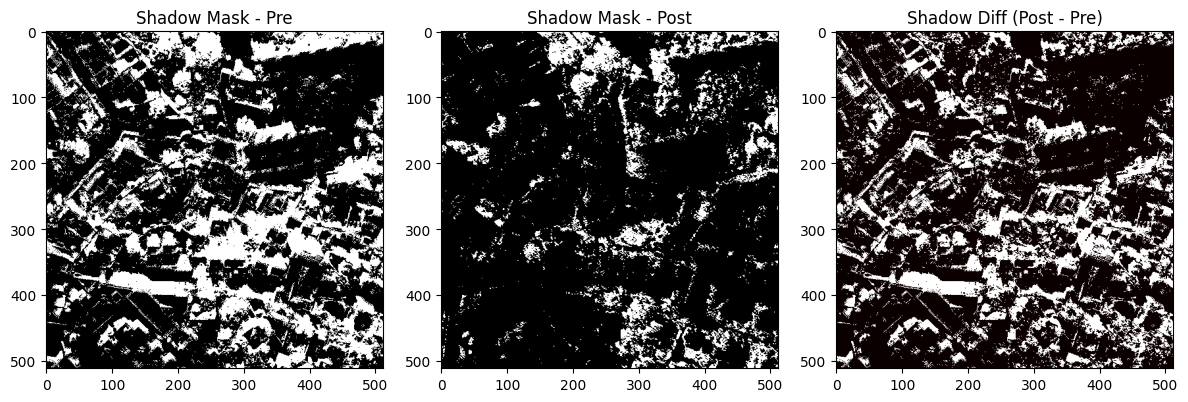

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(shadow_pre, cmap='gray')
plt.title("Shadow Mask - Pre")

plt.subplot(1, 3, 2)
plt.imshow(shadow_post, cmap='gray')
plt.title("Shadow Mask - Post")

plt.subplot(1, 3, 3)
plt.imshow(shadow_diff, cmap='hot')
plt.title("Shadow Diff (Post - Pre)")

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5019607843137255..0.4980392156862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5019607843137255..0.4980392156862745].


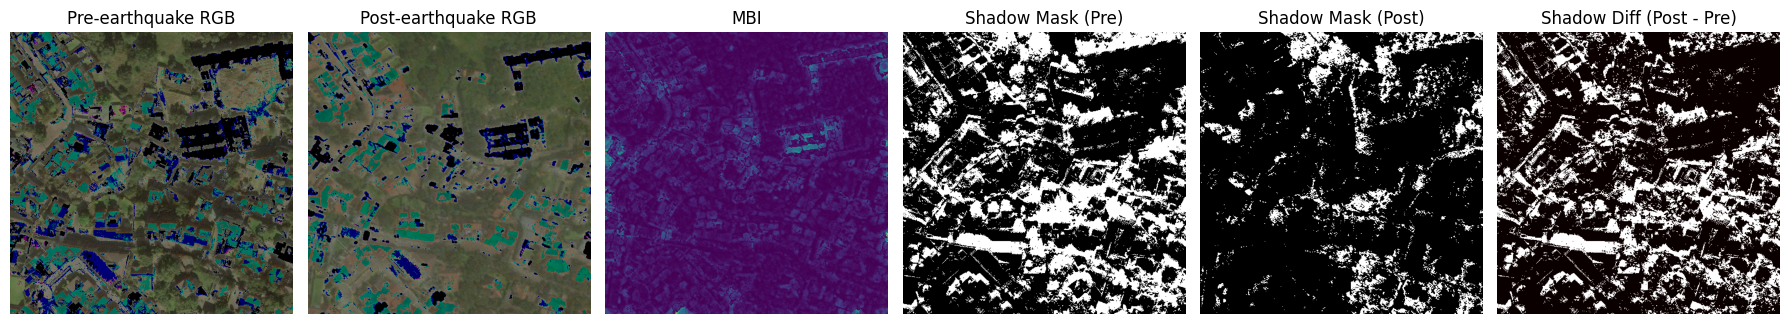

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 5))

# Pre-disaster RGB image
plt.subplot(1, 6, 1)
plt.imshow(pre_image)
plt.title("Pre-earthquake RGB")
plt.axis('off')

# Post-disaster RGB image
plt.subplot(1, 6, 2)
plt.imshow(post_image)
plt.title("Post-earthquake RGB")
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(mbi)
plt.title("MBI")
plt.axis('off')

# Shadow mask from pre
plt.subplot(1, 6, 4)
plt.imshow(shadow_pre, cmap='gray')
plt.title("Shadow Mask (Pre)")
plt.axis('off')

# Shadow mask from post
plt.subplot(1, 6, 5)
plt.imshow(shadow_post, cmap='gray')
plt.title("Shadow Mask (Post)")
plt.axis('off')

# Shadow difference
plt.subplot(1, 6, 6)
plt.imshow(shadow_diff, cmap='hot')
plt.title("Shadow Diff (Post - Pre)")
plt.axis('off')

plt.tight_layout()
plt.show()
